In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and Read Titanic-dataset
data = pd.read_csv("Titanic-Dataset.csv")
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

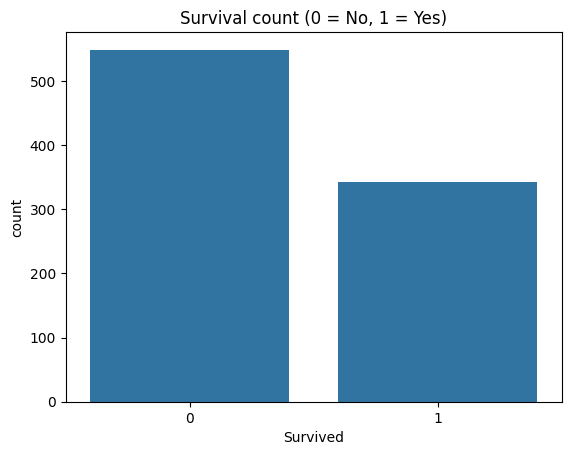

In [4]:
# Survival count
sns.countplot(x='Survived', data=data)
plt.title("Survival count (0 = No, 1 = Yes)")
plt.show()

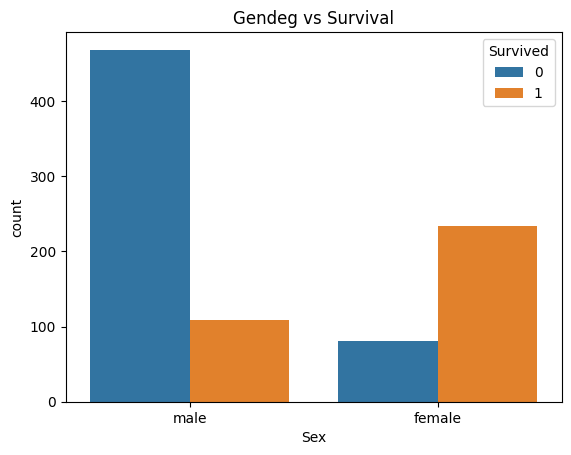

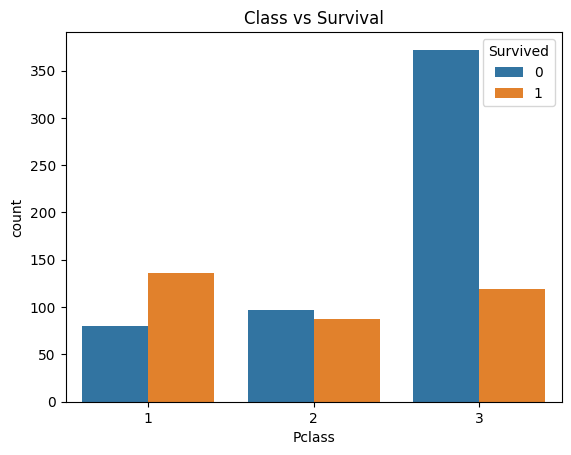

In [8]:
# Gender vs Survival Plotting
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Gendeg vs Survival")
plt.show()

# Class vs Survival Plotting
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title("Class vs Survival")
plt.show()

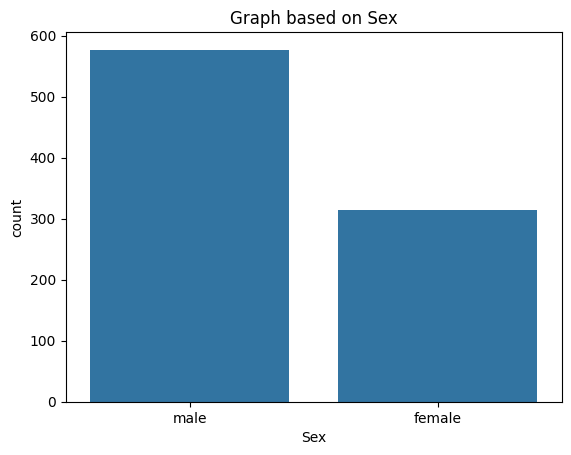

In [9]:
sns.countplot(x='Sex', data=data)
plt.title("Graph based on Sex")
plt.show()

In [22]:
# Data cleaning

# Drop unnecessary columns
#data = data.drop(['Ticket', 'Cabin'], axis=1)
data = data.drop(['Name'], axis=1)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
#data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.fillna({'Embarked':data['Embarked'].mode()[0]}, inplace=True)

# Convert categorical to numerical using LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.head()

C:\Users\BHAGESH S M\AppData\Local\Temp\ipykernel_20488\3644561091.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [24]:
# Features and Target
x = data.drop('Survived', axis=1)
y = data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Model Training

#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
logregression_pred = log_reg.predict(x_test)

#Decision tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
decisiontree_pred = tree.predict(x_test)

#Random Forest
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
randomforest_pred = forest.predict(x_test)

# Model Evaluation
models = { "Logistic Regression": logregression_pred,
           "Decision Tree": decisiontree_pred,
           "Random Forest": randomforest_pred }
#print(models)
print("Logictic Regression:", logregression_pred)
print("Decision Tree:", decisiontree_pred)
print("Random Forest:", randomforest_pred)

for model, preds in models.items():
    print(f"\n {model}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


Logictic Regression: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0]
Decision Tree: [0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
Random Forest: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 

C:\Users\BHAGESH S M\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
